## 크롤링 (2)
https://wikidocs.net/6660<br>
파이썬에서는 requests 모듈을 이용해 HTML 코드를 다운로드하고, BeautifulSoup 모듈로 원하는 데이터를 파싱한다

#### * requests 모듈
https://wikidocs.net/85737<br>
https://brownbears.tistory.com/198

- requests.get( ) : url 요청하기  (출력값 <Response [200]> : 정상적으로 잘 가져왔다는 의미)
- response.status_code : 응답 코드
- response.text : 응답을 text형식으로 출력

- response.raise_for_status() : 200 OK 코드가 아닌 경우 에러 발동
- response.json() : json response일 경우 딕셔너리 타입으로 바로 변환
- response.url : 요청 url 확인
- response.request : 내가 보낸 request 객체에 접근 가능

In [ ]:
res = requests.get(url)

In [ ]:
res.status_code

#### * BeautifulSoup 모듈
https://defineall.tistory.com/640<br>
https://jennana.tistory.com/160

request.text 를 이용해 가져온 데이터는 텍스트 형태의 html 이다<br>
BeautifulSoup 모듈 은 이러한 텍스트 형태의 데이터에서 원하는 html 태그를 쉽게 추출할 수 있게 도와준다<br>
즉, html을 'soup 객체' 로 만들어서 추출하기 쉽게 만들어 준다<br>

'soup 객체' 로 만들 데이터를 주고 'lxml' 또는 'html.parser' 형식으로 저장한다

In [1]:
import pandas as pd
import numpy as np

In [2]:
from urllib import request
from bs4 import BeautifulSoup
import requests

In [3]:
#Daum 검색 url
url = 'https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q=%ED%95%9C%EA%B5%AD'

#### * User-Agent : 접속하는 사람/프로그램에 대한 정보, 딕셔너리 형태
requests.get( ) 으로 url을 가져올 때, 가져올 url에서 기계가 홈페이지에 접속하지 못하게 막아 두는 경우가 있다. 이럴 때 기계가 아님을 증명하기 위해 'User-Agent' 를 사용한다<br>

user-agent (유저정보) : http://m.avalon.co.kr/check.html 사이트 접속하여 확인<br>

딕셔너리 { "User-Agent" : } 형태로 입력<br>

항상 일정한 형식으로 크롤링을 해오기 위해서 User-Agent 값을 정해두고 크롤링을 수행해야 한다

In [4]:
#Daum 사이트는 url 코드를 사용하는데에 제한을 주므로 'User-Agent' 를 사용한다
header = {'User-Agent' : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"}

In [5]:
request.urlopen(url).read()

b'<script type="text/javascript">\nlocation.replace( "https://ncaptcha.search.daum.net/captcha/show?redirect=http%3A%2F%2Fsearch.daum.net%2Fsearch%3Fw%3Dnews%26nil_search%3Dbtn%26DA%3DNTB%26enc%3Dutf8%26cluster%3Dy%26cluster_page%3D1%26q%3D%25ED%2595%259C%25EA%25B5%25AD" );\n</script>\n'

In [7]:
html = requests.get(url, headers = header).text

In [9]:
soup = BeautifulSoup(html, 'html.parser')
type(soup)

bs4.BeautifulSoup

### ① 뉴스 기사의 제목만 10개 추출

In [10]:
soup


<!DOCTYPE html>

<html class="win chrome" lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head profile="http://a9.com/-/spec/opensearch/1.1/">
<meta content="text/html;charset=utf-8" http-equiv="content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="off" name="autocomplete"/>
<meta content="always" name="referrer"/>
<meta content="telephone=no" name="format-detection">
<meta content="한국 – Daum 검색" property="og:title"/>
<meta content="https://search.daum.net/search?w=news&amp;q=%ED%95%9C%EA%B5%AD" property="og:url"/>
<meta content="Daum 검색에서 한국에 대한 최신정보를 찾아보세요." property="og:description"/>
<meta content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" property="og:image"/>
<meta content="다음검색" property="og:site_name"/>
<title>한국 – Daum 검색</title>
<link href="//search.daum.net/OpenSearch.xml" rel="search" title="Daum" type="application/opensearchdescription+xml"/>
<link charset="utf-8" href="//search1.daumcdn.net/search/statics/common

In [12]:
news_tit = soup.find_all(class_ = "tit_main fn_tit_u")

In [18]:
news_tit[0].text
news_tit.text()

AttributeError: ResultSet object has no attribute 'text'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [19]:
#[news_tit[i].text for i in range(len(news_tit))]
[tit.text for tit in news_tit]

['“한국에서 미국 주립대 학위 받아요.”',
 '한국 언론의 국제뉴스 보도, 이래서 문제다',
 '"한국, 마약청정국 지위 7년전 이미 잃었다"',
 '한국, 7년만에 日관함식 참석한다',
 '뉴델리서 선보인 한국전통 혼인잔치…한식페스타 개막',
 "수출감소에 고물가·어닝쇼크…한국경제 성장 '빨간불'",
 '"세계공급망 재편은 기회…기업에 인센티브 줘야 한국 온다"',
 '프랑스 매체 “한국-일본, 카타르 WC 조별리그 탈락 예상”',
 "한류의 모든 것, 지구촌 함께한 '한국문화축제'",
 '\'근로자 사망 사고\' 한국타이어 측 "비정상적 방식 작업 이뤄져"']

In [23]:
news_tit[0]
news_tit[0]['href']

'http://v.media.daum.net/v/20221027030701102?f=o'

In [24]:
for tit in news_tit:
    print(tit.text, ':', tit['href'])

“한국에서 미국 주립대 학위 받아요.” : http://v.media.daum.net/v/20221027030701102?f=o
한국 언론의 국제뉴스 보도, 이래서 문제다 : http://v.media.daum.net/v/20221027143509201?f=o
"한국, 마약청정국 지위 7년전 이미 잃었다" : http://v.media.daum.net/v/20221027140023647?f=o
한국, 7년만에 日관함식 참석한다 : http://v.media.daum.net/v/20221027173011503?f=o
뉴델리서 선보인 한국전통 혼인잔치…한식페스타 개막 : http://v.media.daum.net/v/20221027135221387?f=o
수출감소에 고물가·어닝쇼크…한국경제 성장 '빨간불' : http://v.media.daum.net/v/20221027102915396?f=o
"세계공급망 재편은 기회…기업에 인센티브 줘야 한국 온다" : http://v.media.daum.net/v/20221027172102090?f=o
프랑스 매체 “한국-일본, 카타르 WC 조별리그 탈락 예상” : http://v.media.daum.net/v/20221027160754692?f=o
한류의 모든 것, 지구촌 함께한 '한국문화축제' : http://v.media.daum.net/v/20221027132010374?f=o
'근로자 사망 사고' 한국타이어 측 "비정상적 방식 작업 이뤄져" : http://v.media.daum.net/v/20221027161959275?f=o


#### find(class_ = ), find_all(class_ = )
#### select_one(selector = ), select(selector = )
'select_one' 은 찾은 html 중 '가장 첫번째 html' 을 가져오고, 'select' 는 '찾은 모든 html' 을 '리스트 형태' 로 반환한다<br>

https://velog.io/@jisu0807/%EC%9B%B9%ED%81%AC%EB%A1%A4%EB%A7%81-BeautifulSoup%EC%97%90%EC%84%9C-find%EC%99%80-select-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0

In [25]:
soup.find(class_ = "tit_main fn_tit_u")

<a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221027030701102?f=o" onclick='smartLog(this, "dc=NNS&amp;d=2621uJ6aLY2j43mVQX&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16bOiOx4gG2S18EPLj&amp;e3=0&amp;ext=dsid=2621uJ6aLY2j43mVQX", event, {"cpid": {"value": "16bOiOx4gG2S18EPLj"}});' target="_blank">“<b>한국</b>에서 미국 주립대 학위 받아요.”</a>

In [28]:
soup.select_one(selector = ".tit_main.fn_tit_u")

<a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221027030701102?f=o" onclick='smartLog(this, "dc=NNS&amp;d=2621uJ6aLY2j43mVQX&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16bOiOx4gG2S18EPLj&amp;e3=0&amp;ext=dsid=2621uJ6aLY2j43mVQX", event, {"cpid": {"value": "16bOiOx4gG2S18EPLj"}});' target="_blank">“<b>한국</b>에서 미국 주립대 학위 받아요.”</a>

In [29]:
soup.select(selector = ".tit_main.fn_tit_u")

[<a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221027030701102?f=o" onclick='smartLog(this, "dc=NNS&amp;d=2621uJ6aLY2j43mVQX&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16bOiOx4gG2S18EPLj&amp;e3=0&amp;ext=dsid=2621uJ6aLY2j43mVQX", event, {"cpid": {"value": "16bOiOx4gG2S18EPLj"}});' target="_blank">“<b>한국</b>에서 미국 주립대 학위 받아요.”</a>,
 <a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221027143509201?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26Y4LqKJiTRpVn5ey4&amp;pg=1&amp;r=2&amp;p=4&amp;rc=10&amp;e1=16X5KwQDDYGM_ae2Qi&amp;e3=0&amp;ext=dsid=26Y4LqKJiTRpVn5ey4", event, {"cpid": {"value": "16X5KwQDDYGM_ae2Qi"}});' target="_blank"><b>한국</b> 언론의 국제뉴스 보도, 이래서 문제다</a>,
 <a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221027140023647?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26NOdHBOR3tmojP8zP&amp;pg=1&amp;r=3&amp;p=4&amp;rc=10&amp;e1=16X5Xh1MWS7Qt1sMrW&amp;e3=0&amp;ext=dsid=26NOdHBOR3tmojP8zP", event, {"cpid": {"value": "16X5Xh1MWS7Qt1sMrW"}});' targ

#### * copy selector
![image.png](attachment:7a32243c-6b92-48f0-bfdd-3521facc9df0.png)
1. 뉴스 검색한 창에서 마우스 오른쪽 버튼 -> '검사'<br>
2. 뉴스 제목 하나 클릭 -> 블럭 표시 되는 부분 아무곳이나 마우스 커서 두고 오른쪽 버튼<br>
3. copy -> copy selector<br>

특정 경로의 태그를 객체로 반환하고 싶을 때, find의 경우 반복적으로 코드를 작성해야 하는 반면, select는 직접 하위 경로를 지정할 수 있다

In [30]:
soup.select(selector = "#newsColl > div.cont_divider > ul > li:nth-child(1) > div.wrap_cont > a")

[<a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221027030701102?f=o" onclick='smartLog(this, "dc=NNS&amp;d=2621uJ6aLY2j43mVQX&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16bOiOx4gG2S18EPLj&amp;e3=0&amp;ext=dsid=2621uJ6aLY2j43mVQX", event, {"cpid": {"value": "16bOiOx4gG2S18EPLj"}});' target="_blank">“<b>한국</b>에서 미국 주립대 학위 받아요.”</a>]

In [32]:
soup.select(selector = "#newsColl > div.cont_divider > ul > li:nth-child(1) > div.wrap_cont")
soup.select(selector = "#newsColl > div.cont_divider > ul > li:nth-child(1)")

[<li> <div class="wrap_thumb" id="news_img_0"> <a class="thumb_bf" href="http://v.media.daum.net/v/20221027030701102?f=o" onclick='smartLog(this, "dc=NNS&amp;d=2621uJ6aLY2j43mVQX&amp;pg=1&amp;r=1&amp;p=1&amp;rc=10&amp;e1=16bOiOx4gG2S18EPLj&amp;e3=0&amp;ext=dsid=2621uJ6aLY2j43mVQX", event, {"cpid": {"value": "16bOiOx4gG2S18EPLj"}});' target="_blank"> <img alt="" data-size="116x80" height="80" onerror="SF.errorImage(this)" src="https://search4.kakaocdn.net/argon/232x160_85_c/K5aumQzAwFq0" width="116"/> </a> </div> <div class="wrap_cont"> <a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221027030701102?f=o" onclick='smartLog(this, "dc=NNS&amp;d=2621uJ6aLY2j43mVQX&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16bOiOx4gG2S18EPLj&amp;e3=0&amp;ext=dsid=2621uJ6aLY2j43mVQX", event, {"cpid": {"value": "16bOiOx4gG2S18EPLj"}});' target="_blank">“<b>한국</b>에서 미국 주립대 학위 받아요.”</a> <p class="tit_sub f_nb">유타대 아시아캠퍼스 학생 제이미 클락</p> <p class="desc">런던 킹스 칼리지로부터 입학 허가를 받았지만 그녀의 선택은 유타대였다. 입학할 당시 

하지만 여러 개의 제목을 가져오기 위해서는 copy selector 기능만으로는 구현하기 힘들다<br>
copy selector 기능은 하나의 특정한 요소를 찾을 때나, 선택자를 잘 모르겠을 때 사용하는 것이 좋다

### ② 2페이지도 출력

In [ ]:
#'첫 폐이지' 의 뉴스들의 제목과 링크를 추출하는 코드
url = 'https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q=%ED%95%9C%EA%B5%AD'
header = {'User-Agent' : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"}

html = requests.get(url, headers = header).text
soup = BeautifulSoup(html, 'lxml')
news_tit = soup.find_all(class_ = "tit_main fn_tit_u")

for tit in news_tit:
    print(tit.text, ':', tit['href'])

In [42]:
#페이지 숫자를 지정하여 출력해보자 -> url 끝에 '&p=' 를 붙여주자
url1 = 'https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q=%ED%95%9C%EA%B5%AD&p='

for i in range(1, 11):
    url = url1 + str(i)
    print(url)

https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q=%ED%95%9C%EA%B5%AD&p=1
https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q=%ED%95%9C%EA%B5%AD&p=2
https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q=%ED%95%9C%EA%B5%AD&p=3
https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q=%ED%95%9C%EA%B5%AD&p=4
https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q=%ED%95%9C%EA%B5%AD&p=5
https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q=%ED%95%9C%EA%B5%AD&p=6
https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q=%ED%95%9C%EA%B5%AD&p=7
https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q=%ED%95%9C%EA%B5%AD&p=8
https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q=%ED%95%9C%EA%B5%AD&p=9
https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q=%ED%95%9C%EA%B5%AD&p=10


In [43]:
#10페이지의 뉴스 제목과 링크를 추출하는 코드
url1 = 'https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q=%ED%95%9C%EA%B5%AD&p='
header = {'User-Agent' : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"}

for i in range(1, 11):
    url = url1 + str(i)
    html = requests.get(url, headers = header).text
    soup = BeautifulSoup(html, 'lxml')
    news_tit = soup.find_all(class_ = "tit_main fn_tit_u")
    
    for tit in news_tit:
        print(tit.text, ':', tit['href'])
    print(f"{i}page 입니다")
    print('-' * 100)
    print()

“한국에서 미국 주립대 학위 받아요.” : http://v.media.daum.net/v/20221027030701102?f=o
한국 언론의 국제뉴스 보도, 이래서 문제다 : http://v.media.daum.net/v/20221027143509201?f=o
"한국, 마약청정국 지위 7년전 이미 잃었다" : http://v.media.daum.net/v/20221027140023647?f=o
한국, 7년만에 日관함식 참석한다 : http://v.media.daum.net/v/20221027173011503?f=o
뉴델리서 선보인 한국전통 혼인잔치…한식페스타 개막 : http://v.media.daum.net/v/20221027135221387?f=o
수출감소에 고물가·어닝쇼크…한국경제 성장 '빨간불' : http://v.media.daum.net/v/20221027102915396?f=o
"세계공급망 재편은 기회…기업에 인센티브 줘야 한국 온다" : http://v.media.daum.net/v/20221027172102090?f=o
프랑스 매체 “한국-일본, 카타르 WC 조별리그 탈락 예상” : http://v.media.daum.net/v/20221027160754692?f=o
한류의 모든 것, 지구촌 함께한 '한국문화축제' : http://v.media.daum.net/v/20221027132010374?f=o
'근로자 사망 사고' 한국타이어 측 "비정상적 방식 작업 이뤄져" : http://v.media.daum.net/v/20221027161959275?f=o
1page 입니다
----------------------------------------------------------------------------------------------------

손흥민이 카타르서 입을 수트, "히어로-K11" 한국축구 단복 공개 : http://v.media.daum.net/v/20221027115427402?f=o
‘현대 한국’ 원년 1968년을 만나다

In [47]:
#검색어를 직접 받아서 해당 검색어에 대한 링크를 추출한다면
url1 = 'https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q='
url2 = input('검색어를 입력하세요:')
url3 = '&p='

url = url1 + url2 + url3 + str(3)
print(url)

검색어를 입력하세요: 손흥민


https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q=손흥민&p=3


In [48]:
#위의 코드를 이용해 10페이지를 추출해보자
url1 = 'https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q='
url2 = input('검색어를 입력하세요:')
url3 = '&p='
header = {'User-Agent' : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"}

for i in range(1, 11):
    url = url1 + url2 + url3 + str(i)
    #print(url)
    
    html = requests.get(url, headers = header).text
    soup = BeautifulSoup(html, 'lxml')    
    news_tit = soup.find_all(class_ = "tit_main fn_tit_u")
    #news_tit[0]
    
    for tit in news_tit:
        print(tit.text, ':', tit['href'])
    print(f"{i}page 입니다")
    print('-' * 100)
    print()

검색어를 입력하세요: 손흥민


‘손흥민 침묵+콘테 퇴장’ 토트넘 16강행 불투명 : http://v.media.daum.net/v/20221027080430365?f=o
[단독] 편의점 CU, 손흥민 모델 발탁 : http://v.media.daum.net/v/20221027142945964?f=o
한국산 ‘월클’의 희비… 김민재 잘 막고, 손흥민 못 넣고 : https://cp.news.search.daum.net/p/124996331
'쏜살(SON+살라) 듀오' 탄생하나? 리버풀 손흥민 영입 추진 : http://v.media.daum.net/v/20221027121610262?f=o
"손흥민 있는 한국, 카타르 월드컵 8강 진출도 가능" : https://cp.news.search.daum.net/p/124990731
손흥민 고군분투했지만…”마무리와 드리블 능력 부족” : http://v.media.daum.net/v/20221027104355019?f=o
김민재 웃고, 손흥민 울고…나폴리 챔스 5연승, 토트넘은 무승부 : http://v.media.daum.net/v/20221027133255720?f=o
손흥민, 레알 이적 불가...이유는 레비 회장 : http://v.media.daum.net/v/20221027082504735?f=o
손흥민 따로, 케인 따로...토트넘 패스맵 또 문제투성이 : http://v.media.daum.net/v/20221027100013044?f=o
'연패는 끊었는데…' 손흥민과 토트넘, 아쉬웠던 무승부 : http://v.media.daum.net/v/20221027060001560?f=o
1page 입니다
----------------------------------------------------------------------------------------------------

英 매체, "손흥민 이적설? 토트넘은 걱정할 필요 없어" : http://v.media.daum.net/v/20221027095008628?f=o
손흥민의 토트넘,

### ③ 출력 함수 생성
naver 검색 사이트 이용

In [67]:
def search_news(keyword, page=10):
    main_url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='
    keyword = keyword
    
    for i in range(1, page+1):
        sub_url = f'&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=136&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={1+(i-1)*10}'
        #print(sub_url)
        
        url = main_url + keyword + sub_url
        html = requests.get(url).text
        soup = BeautifulSoup(html, 'lxml')
        news_tit = soup.find_all(class_ = "news_tit")
        
        for tit in news_tit:
            print(tit.text, ':', tit.attrs['href'])
        print(f"{i}page 입니다")
        print("-" * 100)
        print()

In [68]:
search_news('손흥민')

김민재 웃고, 손흥민 울고…나폴리 챔스 5연승, 토트넘은 무승부 : https://www.donga.com/news/article/all/20221027/116182769/1
'토트넘, 최소 2년 동안 손흥민 이적 고려 없다' : http://www.mydaily.co.kr/new_yk/html/read.php?newsid=202210271356576447&ext=na&utm_campaign=naver_news&utm_source=naver&utm_medium=related_news
'손흥민 골?'...본머스-토트넘전 대상 축구토토 승무패 59회차 발매 : http://news.tf.co.kr/read/toto/1974696.htm
[단독] 편의점 CU, 손흥민 모델 발탁 : http://www.edaily.co.kr/news/newspath.asp?newsid=03070086632497184
'슈팅 4차례 쏟아낸' 손흥민, 스포르팅전 평점 6~7점대 : http://www.newsis.com/view/?id=NISX20221027_0002062985&cID=10523&pID=10500
'손흥민 풀타임'토트넘, 스포르팅과 무승부 : https://imnews.imbc.com/replay/2022/nwtoday/article/6421033_35752.html
토트넘, 스포르팅과 1대1 무승부... 손흥민 4G연속 골 침묵 : https://www.sisamagazine.co.kr/news/articleView.html?idxno=471585
'쏜살(SON+살라) 듀오' 탄생하나? 리버풀 손흥민 영입 추진 : http://sports.chosun.com/news/ntype.htm?id=202210270100186920013233&servicedate=20221027
손흥민, ‘골 침묵’ 길어도 믿고 기다려…토트넘 챔스 16강은? : https://www.hani.co.kr/arti/sports/soccer/1064443.html
'슈팅 4개' 손흥민 4G 연속 침

#### * 출력 내용을 DataFrame 으로 저장하는 함수 생성

In [69]:
def search_news(keyword, page=10):
    main_url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='
    keyword = keyword
    
    lst_title = []
    lst_url = []
    
    for i in range(1, page+1):
        sub_url = f'&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=136&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={1+(i-1)*10}'
        #print(sub_url)
        
        url = main_url + keyword + sub_url
        html = requests.get(url).text
        soup = BeautifulSoup(html, 'lxml')
        news_tit = soup.find_all(class_ = "news_tit")
        
        for tit in news_tit:
            lst_title.append(tit.text)
            lst_url.append(tit.attrs['href'])
        data = pd.DataFrame({'제목' : lst_title, '링크' : lst_url})
        
    return data

In [70]:
search_news('영화 올빼미')

,제목,링크
0,왜 ‘올빼미’인가,http://sports.khan.co.kr/news/sk_index.html?ar...
1,운명 같은 인연 '올빼미' 각별한 재회,https://news.jtbc.co.kr/article/article.aspx?n...
2,"'올빼미' 배우·감독의 특별한 인연 ""17년 만 조우""",https://star.ytn.co.kr/_sn/0117_20221025083531...
3,"‘올빼미’ 스틸, 유해진X류준열의 극과 극 ‘반전’",http://star.mbn.co.kr/view.php?year=2022&no=93...
4,"'올빼미' 유해진 ""살다 살다 왕까지 연기, 곤룡포에 마음 달라져"" [N현장]",https://www.news1.kr/articles/4835746
...,...,...
95,"안은진, 영화 올빼미 잘 부탁드립니다",http://www.newspim.com/news/view/20221018000708
96,[사진]즐거운 '올빼미' 제작보고회,http://www.osen.co.kr/article/G1111968374
97,"'올빼미' 최무성 ""극중 류준열과 손잡는 장면, 아들 손 잡는 느낌""",http://enews.imbc.com/News/RetrieveNewsInfo/36...
98,'왕이 된 남자' 유해진 VS '주맹증' 류준열의 세 번째 만남...일낼까 [SS현...,http://www.sportsseoul.com/news/read/1169225?r...


#### * csv 파일로 저장하기

In [71]:
def search_news(keyword, page=10):
    main_url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='
    keyword = keyword
    
    lst_title = []
    lst_url = []
    
    for i in range(1, page+1):
        sub_url = f'&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=136&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={1+(i-1)*10}'
        #print(sub_url)
        
        url = main_url + keyword + sub_url
        html = requests.get(url).text
        soup = BeautifulSoup(html, 'lxml')
        news_tit = soup.find_all(class_ = "news_tit")
        
        for tit in news_tit:
            lst_title.append(tit.text)
            lst_url.append(tit.attrs['href'])
        data = pd.DataFrame({'제목' : lst_title, '링크' : lst_url})
        data.to_csv(f"{keyword}.csv")
        
    return data

In [72]:
search_news('영화 올빼미')

,제목,링크
0,왜 ‘올빼미’인가,http://sports.khan.co.kr/news/sk_index.html?ar...
1,운명 같은 인연 '올빼미' 각별한 재회,https://news.jtbc.co.kr/article/article.aspx?n...
2,"'올빼미' 배우·감독의 특별한 인연 ""17년 만 조우""",https://star.ytn.co.kr/_sn/0117_20221025083531...
3,"‘올빼미’ 스틸, 유해진X류준열의 극과 극 ‘반전’",http://star.mbn.co.kr/view.php?year=2022&no=93...
4,"'올빼미' 유해진 ""살다 살다 왕까지 연기, 곤룡포에 마음 달라져"" [N현장]",https://www.news1.kr/articles/4835746
...,...,...
95,"안은진, 영화 올빼미 잘 부탁드립니다",http://www.newspim.com/news/view/20221018000708
96,[사진]즐거운 '올빼미' 제작보고회,http://www.osen.co.kr/article/G1111968374
97,"'올빼미' 최무성 ""극중 류준열과 손잡는 장면, 아들 손 잡는 느낌""",http://enews.imbc.com/News/RetrieveNewsInfo/36...
98,'왕이 된 남자' 유해진 VS '주맹증' 류준열의 세 번째 만남...일낼까 [SS현...,http://www.sportsseoul.com/news/read/1169225?r...


### ④ 이미지 검색 저장하기

In [1]:
import pandas as pd
import numpy as np

from urllib import request
from bs4 import BeautifulSoup
import requests

In [2]:
url = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query=류준열'

html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="류준열 : 네이버 이미지검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'류준열'의 네이버 이미지검색 결과입니다." property="og:description"/> <meta content="'류준열'의 네이버 이미지검색 결과입니다." lang="ko" name="description"/> <title>류준열 : 네이버 이미지검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_221027.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sst

In [3]:
images = soup.find_all(class_ = '_image_listImage')
images

[]

#### * selenium
https://wikidocs.net/91474<br>
https://greeksharifa.github.io/references/2020/10/30/python-selenium-usage/<br>

* Selenium 라이브러리를 사용하는 이유
1. 자바스크립트가 동적으로 만든 데이터를 크롤링 하기 위해
2. 사이트의 다양한 HTML 요소에 클릭, 키보드 입력 등 이벤트를 주기 위해

Selenium을 잘 활용하면, 평소에 반복적으로 하고 있는 웹상의 업무를 자동화할 수도 있다

In [4]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [5]:
import selenium

In [6]:
from selenium import webdriver

In [7]:
from urllib.request import urlopen, urlretrieve
from urllib.parse import quote_plus

* Chrome driver 설치 : https://chromedriver.chromium.org/downloads<br>
크롬 드라이버란 크롬 브라우저를 제어하기 위한 드라이버 이다.<br>
크롬 외에도 IE, 파이어폭스등 다양한 브라우저도 가능하다

In [8]:
webdriver.Chrome("C:/Users/AB350/chromedriver.exe")

C:\Users\AB350\AppData\Local\Temp\ipykernel_11580\611863224.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  webdriver.Chrome("C:/Users/AB350/chromedriver.exe")


<selenium.webdriver.chrome.webdriver.WebDriver (session="d245210ec95100150287c5753e3a6547")>

In [10]:
driver = webdriver.Chrome("C:/Users/AB350/chromedriver.exe")
#driver.close()    #브라우저 닫기

C:\Users\AB350\AppData\Local\Temp\ipykernel_11580\775075771.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/Users/AB350/chromedriver.exe")


In [11]:
url1 = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
url2 = quote_plus("영화 올빼미")     #quote_plus( ) : 한글을 처리해주는 함수
url = url1 + url2
url

'https://search.naver.com/search.naver?where=image&sm=tab_jum&query=%EC%98%81%ED%99%94+%EC%98%AC%EB%B9%BC%EB%AF%B8'

In [12]:
driver.get(url)

'<html lang="ko" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/107.0.0.0 safari/537.36" data-platform="win32"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="영화 올빼미 : 네이버 이미지검색"> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'영화 올빼미\'의 네이버 이미지검색 결과입니다."> <meta name="description" lang="ko" content="\'영화 올빼미\'의 네이버 이미지검색 결과입니다."> <title>영화 올빼미 : 네이버 이미지검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver"><link re
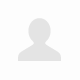
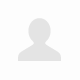

In [13]:
html = driver.page_source
html

driver.get(url) 과 driver.page_source 는 한 셀 안에 입력하지 않는다<br>
driver.get(url)이 url을 다 받아오기 전에 driver.page_source 이 먼저 실행이 다 되어 버릴 수 있다

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/107.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="영화 올빼미 : 네이버 이미지검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'영화 올빼미'의 네이버 이미지검색 결과입니다." property="og:description"/> <meta content="'영화 올빼미'의 네이버 이미지검색 결과입니다." lang="ko" name="description"/> <title>영화 올빼미 : 네이버 이미지검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link
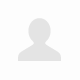
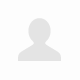

In [14]:
#driver = webdriver.Chrome("C:/Users/admin/chromedriver_win32/chromedriver.exe")
soup = BeautifulSoup(html, 'html.parser')
soup

In [15]:
images = soup.find_all(class_ = '_image _listImage')
images

[<img alt="한국•영화 - 올빼미 (2022)" class="_image _listImage" data-org-height="491" data-org-width="340" src="https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMjEwMThfMjgx%2FMDAxNjY2MDc5NDc3Nzg1.skwnr-zqn1kAaSG0wQNl_-UBf00qiyRQ159VH7nIcQAg.Z-KdV7fYGTbtrsayNhKa5Q5oBNJ1wLUQlGG_cCKvTOQg.JPEG.eyj2019%2FIMG_8186.jpg&amp;type=a340" style="height: 315px; opacity: 1;"/>,
 <img alt="유해진 이번영화, 차기작 올빼미 출연 결정" class="_image _listImage" data-org-height="251" data-org-width="340" src="https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTA4MjdfMTA4%2FMDAxNjMwMDMyMTU2Mzgy.oBI22u3Y80JNTWbE5abXgerpYwME7fpoJP21BECx2Cwg.GJPbQ4VuBEE_MYB6ERN4aNSAG-4JcY9pyw1qKPZ8A24g.PNG.kimk3838%2FG3.PNG&amp;type=a340" style="height: 161px; opacity: 1;"/>,
 <img alt="'올빼미' 류준열 &quot;시각에 제한, 오감 이상의 무엇 발견&quot;" class="_image _listImage" data-org-height="227" data-org-width="340" src="https://search.pstatic.net/common/?src=http%3A%2F%2Fimgnews.naver.net%2Fimage%2F5339%2F2022%

In [17]:
for image in images:
    #print(image.text, ':', image.attrs['src'])
    print(image['src'])

https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMjEwMThfMjgx%2FMDAxNjY2MDc5NDc3Nzg1.skwnr-zqn1kAaSG0wQNl_-UBf00qiyRQ159VH7nIcQAg.Z-KdV7fYGTbtrsayNhKa5Q5oBNJ1wLUQlGG_cCKvTOQg.JPEG.eyj2019%2FIMG_8186.jpg&type=a340
https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTA4MjdfMTA4%2FMDAxNjMwMDMyMTU2Mzgy.oBI22u3Y80JNTWbE5abXgerpYwME7fpoJP21BECx2Cwg.GJPbQ4VuBEE_MYB6ERN4aNSAG-4JcY9pyw1qKPZ8A24g.PNG.kimk3838%2FG3.PNG&type=a340
https://search.pstatic.net/common/?src=http%3A%2F%2Fimgnews.naver.net%2Fimage%2F5339%2F2022%2F10%2F13%2F0000254403_002_20221013084601893.jpg&type=a340
https://search.pstatic.net/common/?src=http%3A%2F%2Fimgnews.naver.net%2Fimage%2F108%2F2021%2F03%2F15%2F0002939501_001_20210315115736789.jpg&type=a340
data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
https://search.pstatic.net/common/?src=http%3A%2F%2Fimgnews.naver.net%2Fimage%2F468%2F2022%2F10%2F18%2F0000891856_001_20221018122903124.jpg&ty

In [20]:
count = 0

for image in images:
    #print(image.text, ':', image.attrs['src'])
    with urlopen(image['src']) as f:
        with open(f"./#images/{count}.jpg", 'wb') as h:
            image_data = f.read()    #데이터 저장
            h.write(image_data)
            
            count += 1

#### * 이미지 저장에 특화된 함수 - urlretrieve
urllib.request.urlopen( ),  이미지를 받아오는 함수

In [21]:
count = 0

for image in images:
    urlretrieve(image['src'], f"./#images/{count}.jpg")
    count += 1


#### * 최소 코드
driver.get(url) 과 driver.page_source 는 한 셀 안에 입력하지 않는다<br>
driver.get(url)이 url을 다 받아오기 전에 driver.page_source 이 먼저 실행이 다 되어 버릴 수 있다<br>
--> time.sleep() 을 이용하여 실행될 시간을 준다<br>

Implicit Waits() : 암묵적 대기<br>
예) driver.implicitly_wait(time_to_wait=5)<br>
찾으려는 element가 로드될 때까지 지정한 시간만큼 대기할 수 있도록 설정한다<br>
이는 한 webdriver에 영구적으로 작용한다. 인자는 초 단위이며, Default 값은 0이다

In [22]:
import time

In [23]:
driver = webdriver.Chrome("C:/Users/AB350/chromedriver.exe")

url1 = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
url2 = quote_plus("류준열")    #quote_plus( ) : 한글을 처리해주는 함수
url = url1 + url2

driver.get(url)
time.sleep(5)     #무조건 5초는 기다리기
#tiem.implicitly_wait(10)    #최대 10초까지 기다리기

html = driver.page_source
driver.close()    #driver 끄기

soup = BeautifulSoup(html, 'html.parser')
images = soup.find_all(class_ = '_image _listImage')

count = 0
for image in images:
    urlretrieve(image['src'], f"./#images/{count}.jpg")
    count += 1


C:\Users\AB350\AppData\Local\Temp\ipykernel_11580\3301109582.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/Users/AB350/chromedriver.exe")
